In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [23]:
dataset = pd.read_csv("Housing.csv")
dataset.head()

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


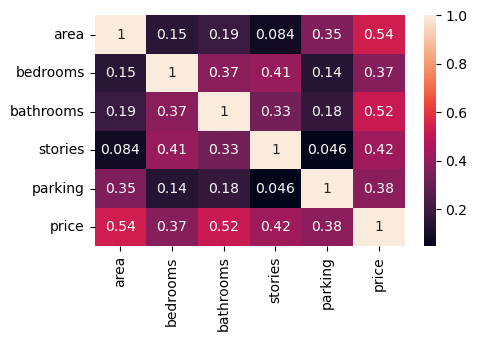

In [32]:
plt.figure(figsize=(5,3))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [33]:
x=dataset.iloc[:,:-1]
y=dataset["price"]

In [34]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,area,bedrooms,bathrooms,stories,parking
0,1.046726,1.403419,1.421812,1.378217,1.517692
1,1.757010,1.403419,5.405809,2.532024,2.679409
2,2.218232,0.047278,1.421812,0.224410,1.517692
3,1.083624,1.403419,1.421812,0.224410,2.679409
4,1.046726,1.403419,-0.570187,0.224410,1.517692
...,...,...,...,...,...
540,-0.991879,-1.308863,-0.570187,-0.929397,1.517692
541,-1.268613,0.047278,-0.570187,-0.929397,-0.805741
542,-0.705921,-1.308863,-0.570187,-0.929397,-0.805741
543,-1.033389,0.047278,-0.570187,-0.929397,-0.805741


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Linear Regression

In [37]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

54.64062355495866

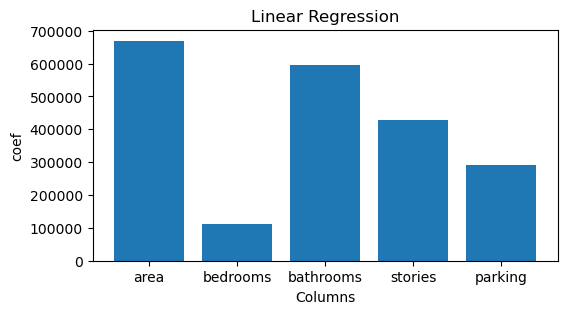

In [46]:
plt.figure(figsize=(6,3))
plt.bar(x.columns,lr.coef_)
plt.title("Linear Regression")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.show()

In [65]:
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(mean_squared_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_absolute_error(y_test,lr.predict(x_test))))

1127483.3523235193
2292721545725.365
1061.8301899661355


# Lasso

In [55]:
la=Lasso(alpha=0.5)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

54.640612085756715

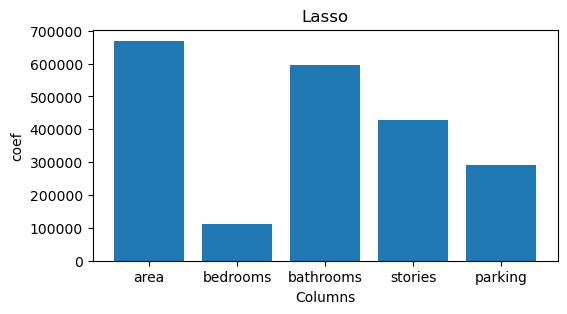

In [56]:
plt.figure(figsize=(6,3))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.show()

In [66]:
print(mean_absolute_error(y_test,la.predict(x_test)))
print(mean_squared_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_absolute_error(y_test,la.predict(x_test))))

1127483.4905263674
2292722125444.234
1061.8302550437934


# #Ridge

In [60]:
ra=Ridge(alpha=10)
ra.fit(x_train,y_train)
ra.score(x_test,y_test)*100

54.415915633981186

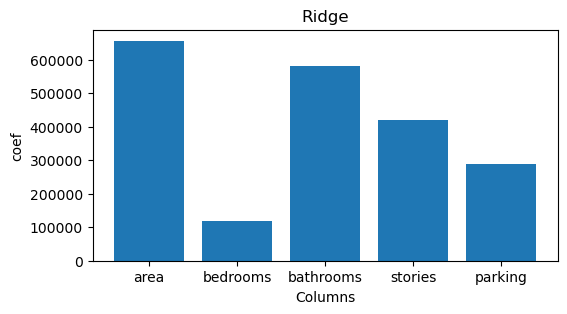

In [61]:
plt.figure(figsize=(6,3))
plt.bar(x.columns,ra.coef_)
plt.title("Ridge")
plt.xlabel("Columns")
plt.ylabel("coef")
plt.show()

In [67]:
print(mean_absolute_error(y_test,ra.predict(x_test)))
print(mean_squared_error(y_test,ra.predict(x_test)))
print(np.sqrt(mean_absolute_error(y_test,ra.predict(x_test))))

1129667.0075548645
2304079565440.306
1062.8579432618756


In [69]:
df = pd.DataFrame({"col_names":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ra.coef_})
df

,col_names,LinearRegression,Lasso,Ridge
0,area,669669.629330,669669.343903,657045.133604
1,bedrooms,111527.301022,111527.114134,118668.763871
2,bathrooms,595247.307815,595247.063061,582967.118776
3,stories,429101.965890,429101.643185,420942.600112
4,parking,290656.734797,290656.414093,289922.180085
